# **DS605: Foundation of Machine Learning**
### Academic Year 2024-25 [Autumn] LAB ASSIGNMENT 2

### Instructor:
* Dr. Arpit Rana

### Teaching Assistant:

* Himanshu Beniwal
* Bhavan Bhatt

## **Group08: THE OUTFLIERS**
### Group Leader:
* Kumar Sanskar (202418027)

### Group Members:
* Lokesh Kumawat (202418028)
* Saarthak Jindal (202418046)
* Jalak Vyas (202418062)

## **Classifying Football Players' Attacking and Defensive Work Rate on FC24 Player Data**

### Credit for the dataset:

* EA Sports FC24

* EA Sports 

* https://sofifa.com/

### About the data:

This dataset contains data of football players used in EA Sports FC24, football-based simulation game.



### Target variable:

***Attacking Work Rate***, players' work rate in the attacking play of the team.


***Defending Work Rate***, players' work rate in the defending play of the team.


### Libraries used:
* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
* NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
* Plotly Express is a dynamic, consistent, high-level API for creating figures.
* Seaborn is a library for making statistical graphics in Python, which builds on top of matplotlib and integrates closely with pandas data structures.
* Scikit Learn is a simple and efficient tool for predictive data analysis, accessible to everybody, and reusable in various contexts,it builds on top of NumPy, SciPy, and matplotlib.


### Importing Modules:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, StackingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset:

In [3]:
df = data= pd.read_csv(r"C:\Users\saarthak\Downloads\male_players.csv")
df

,Unnamed: 0,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
0,0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,...,77,64,High,Low,Right,4,5,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
1,1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,...,93,87,High,Medium,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
2,2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,...,74,75,High,Medium,Right,5,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
3,3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,...,68,44,Low,Low,Left,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
4,4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,...,82,63,Medium,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15840,15840,Deven Sawhney,India,Odisha FC,LB,21,47,62,26,34,...,57,58,High,Medium,Left,3,2,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
15841,15841,Wang Tengda,China PR,Dalian Pro,CM,22,47,61,37,45,...,42,51,Medium,Medium,Right,3,2,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
15842,15842,Wu Yuhang,China PR,Zhejiang Pro,CDM,22,47,56,34,43,...,51,56,Medium,Medium,Right,3,2,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
15843,15843,Ye Daoxin,China PR,Zhejiang Pro,CB,17,47,58,28,33,...,48,46,Medium,Medium,Right,3,2,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN


### Data Pre-processing:

In [4]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop(['Name','Nation','Club','URL','Gender'],axis=1)
df['GK'] = df['GK'].replace(np.nan,0)

### Label Encoding:

In [5]:
df['Att work rate'] = df['Att work rate'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['Def work rate'] = df['Def work rate'].map({'High': 2, 'Medium': 1, 'Low': 0})

### Identifying The Numerical and Categorical Type Features:

In [6]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features,"\n")
categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:')
print(categorical_features)

There are 39 numerical features:
['Age', 'Overall', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Acceleration', 'Sprint', 'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free', 'Curve', 'Agility', 'Balance', 'Reactions', 'Ball', 'Composure', 'Interceptions', 'Heading', 'Def', 'Standing', 'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Att work rate', 'Def work rate', 'Weak foot', 'Skill moves', 'GK'] 

There are 2 categorical features:
['Position', 'Preferred foot']


### Grouping the players position to role bins:

In [7]:
def categorize_position(pos):
    if pos in ['ST', 'CF', 'RW', 'LW']:
        return 'Forward'
    elif pos in ['CM', 'CDM', 'CAM', 'RM', 'LM']:
        return 'Midfielder'
    elif pos in ['CB', 'LB', 'RB', 'LWB', 'RWB']:
        return 'Defender'
    elif pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

df['pos'] = df['Position'].apply(categorize_position)
df = pd.get_dummies(df, columns=['pos'], drop_first=False)
df = pd.get_dummies(df, columns=['Preferred foot'], drop_first=False)
df = df.drop('Position',axis=1)

### Scaling the values of the features:

In [8]:
def scale_to_5(value, max_value=100, new_min=0, new_max=5):
    return new_min + (value / max_value) * (new_max - new_min)

columns_to_scale = ['Overall', 'Pace','Shooting', 'Passing',
       'Dribbling', 'Defending', 'Physicality', 'Acceleration', 'Sprint',
       'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties',
       'Vision', 'Crossing', 'Free', 'Curve', 'Agility', 'Balance',
       'Reactions', 'Ball', 'Composure', 'Interceptions', 'Heading', 'Def',
       'Standing', 'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression','GK']

for column in columns_to_scale:
    df[column] = df[column].apply(lambda x: scale_to_5(x))

### Subsetting the features on the basis of its nature:

In [9]:
offensive_features = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Acceleration', 'Sprint', 
    'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties', 
    'Vision', 'Crossing', 'Free', 'Curve', 'Ball', 'Composure', 'Skill moves']

defensive_features = ['Defending', 'Interceptions', 'Heading', 'Def', 'Standing', 
    'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'GK']

neutral_features = ['Age', 'Overall', 'Physicality', 'Agility', 'Balance', 
    'Reactions', 'Weak foot', 'Preferred foot_Left', 'Preferred foot_Right']

## Data Analysis:

### Distribution of Player Overall Ratings:

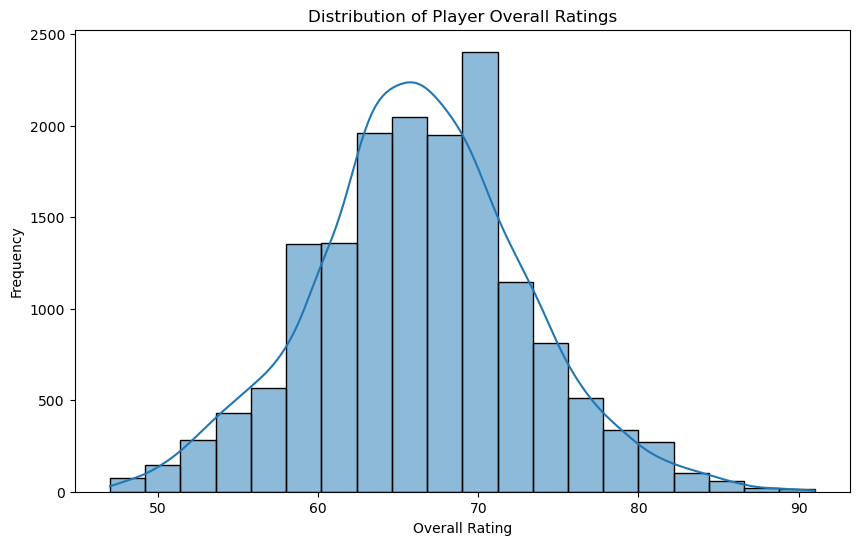

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Overall'], bins=20, kde=True)
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

### Overall Rating by Position:

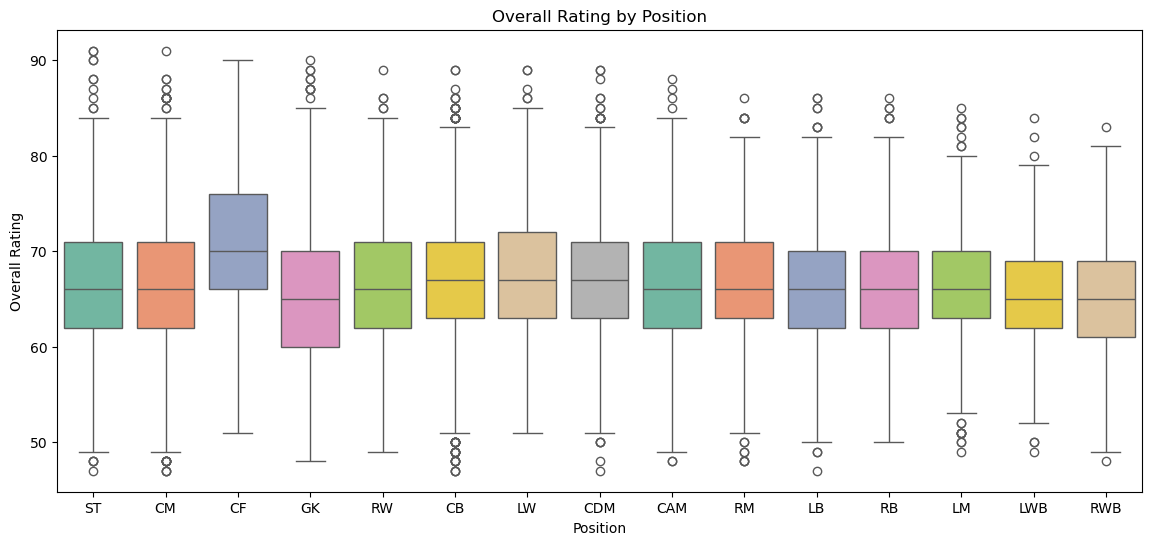

In [11]:
from pickle import DEFAULT_PROTOCOL
plt.figure(figsize=(14, 6))
sns.boxplot(x='Position', y='Overall', palette='Set2', data=data)
plt.title('Overall Rating by Position')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.show()

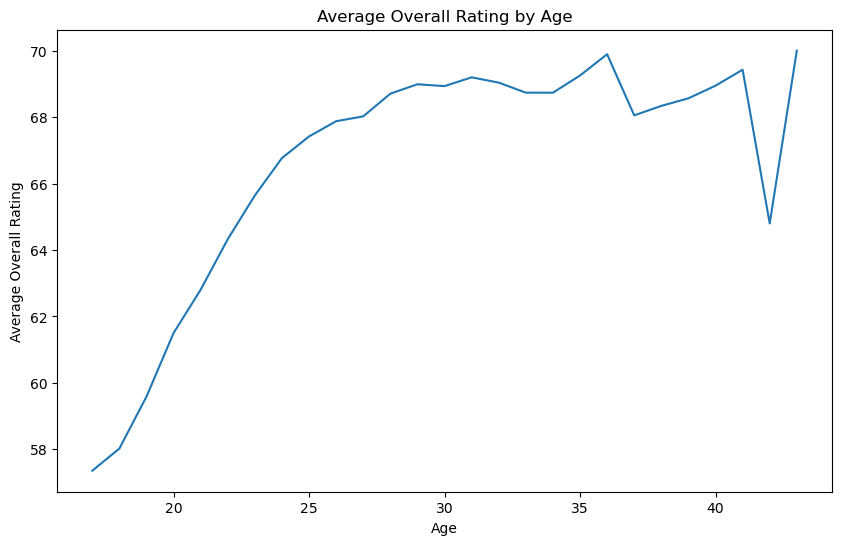

In [54]:
age_avg_rating = data.groupby('Age')['Overall'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Overall', data=age_avg_rating)
plt.title('Average Overall Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')
plt.show()

### Skill Moves vs Weak Foot:

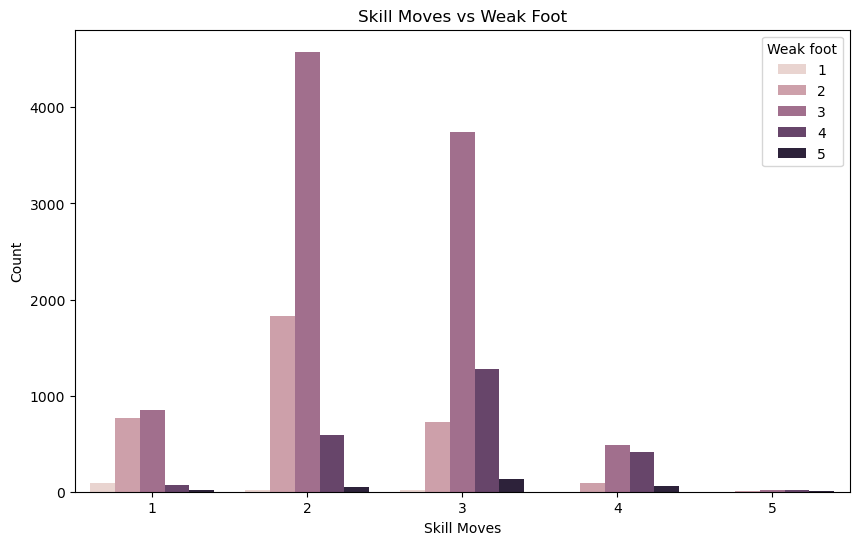

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Skill moves', hue='Weak foot', data=data)
plt.title('Skill Moves vs Weak Foot')
plt.xlabel('Skill Moves')
plt.ylabel('Count')
plt.show()

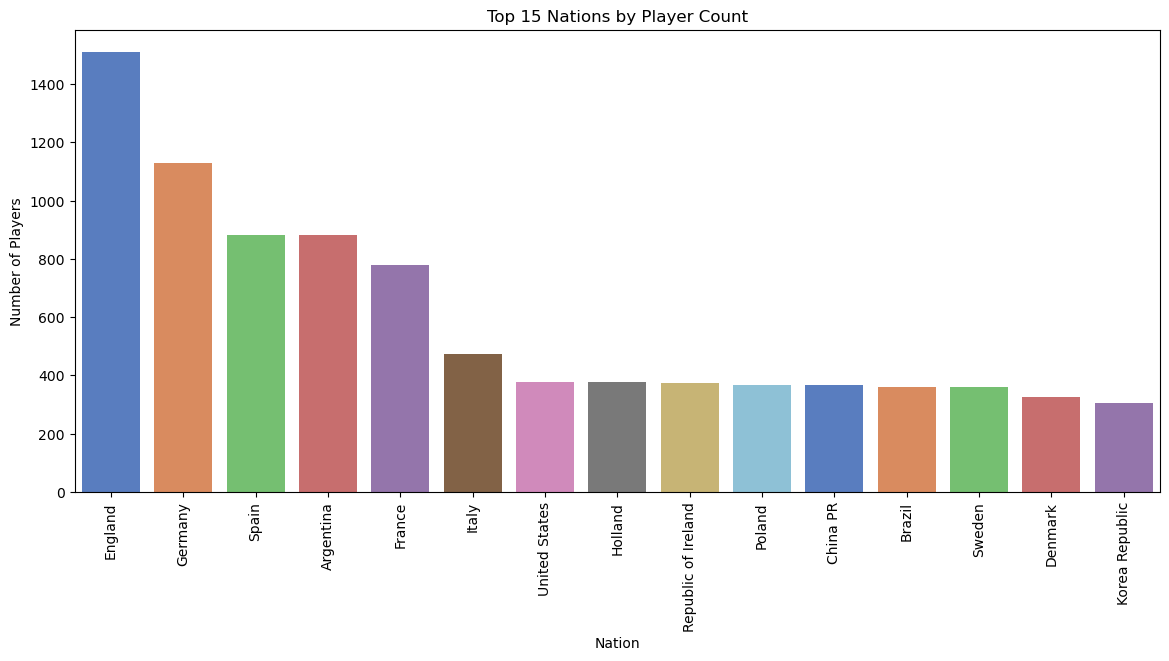

In [14]:
plt.figure(figsize=(14, 6))
nation_counts = data['Nation'].value_counts().head(15)
sns.barplot(x=nation_counts.index, y=nation_counts,palette='muted')
plt.title('Top 15 Nations by Player Count')
plt.xlabel('Nation')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

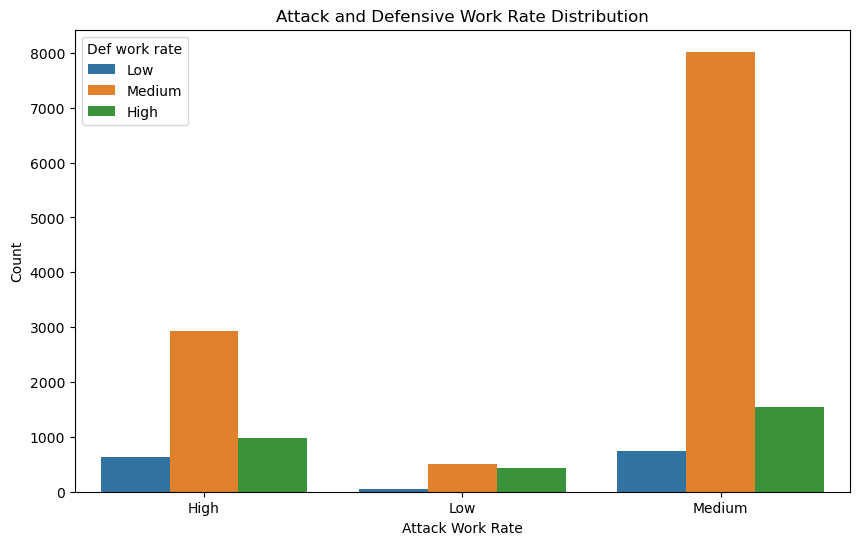

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Att work rate', hue='Def work rate', data=data)
plt.title('Attack and Defensive Work Rate Distribution')
plt.xlabel('Attack Work Rate')
plt.ylabel('Count')
plt.show()

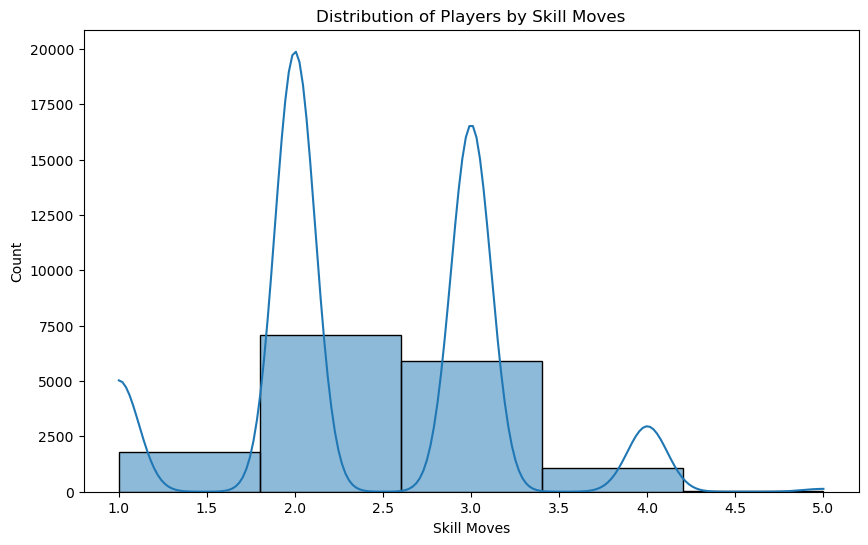

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Skill moves'], bins=5, kde=True)
plt.title('Distribution of Players by Skill Moves')
plt.xlabel('Skill Moves')
plt.ylabel('Count')
plt.show()

<Figure size 2500x1400 with 0 Axes>

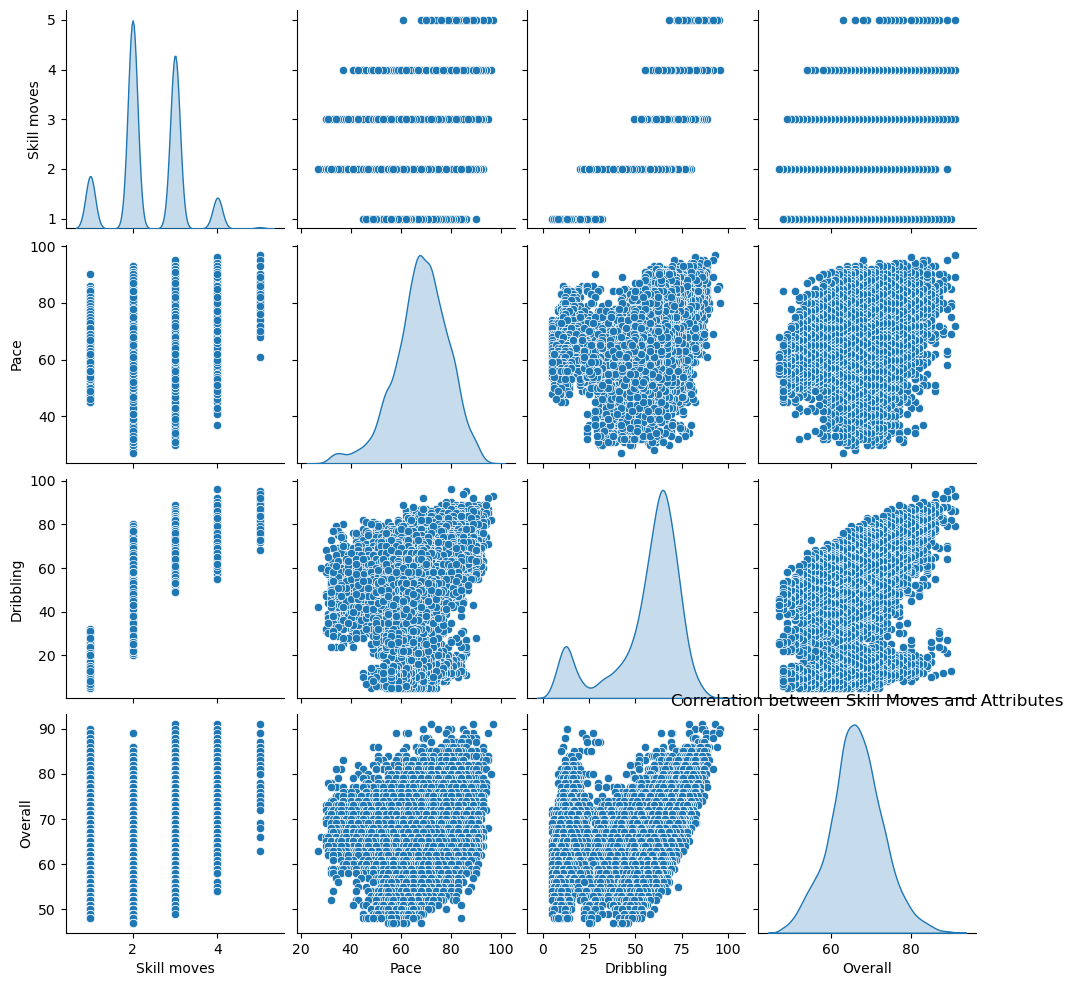

In [10]:
plt.figure(figsize=(25, 14))
sns.pairplot(data[['Skill moves', 'Pace', 'Dribbling', 'Overall']], diag_kind='kde')
plt.title('Correlation between Skill Moves and Attributes')
plt.show()

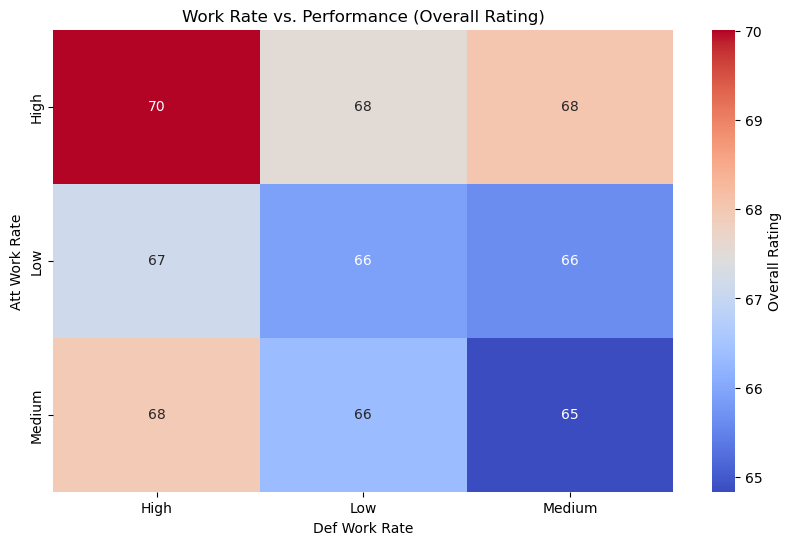

In [58]:
work_rate_data = data.groupby(['Att work rate', 'Def work rate'])['Overall'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(work_rate_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Overall Rating'})
plt.title('Work Rate vs. Performance (Overall Rating)')
plt.xlabel('Def Work Rate')
plt.ylabel('Att Work Rate')
plt.show()

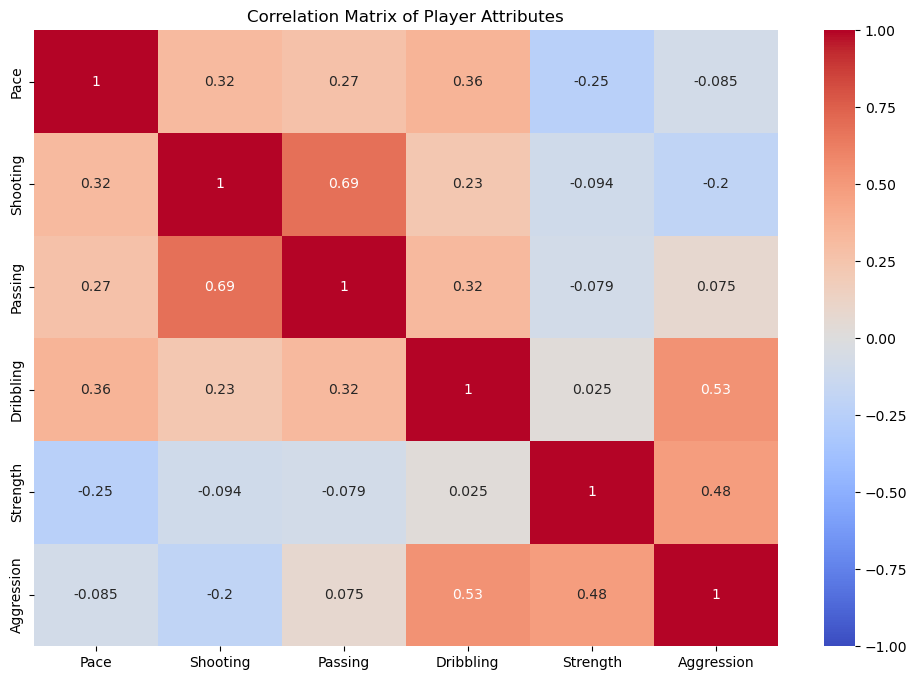

In [53]:
plt.figure(figsize=(12, 8))
corr_matrix = data[['Pace', 'Shooting', 'Passing', 'Dribbling', 'Strength', 'Aggression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Player Attributes')
plt.show()

# Predicting Attacking Work Rate

### Specifying weights for offensive features:

In [43]:
df['Offense_weighted'] = df[offensive_features].mean(axis=1) * 2 
df['Neutral weighted'] = df[neutral_features].mean(axis=1) * 1.5
df['Defense_weighted'] = df[defensive_features].mean(axis=1) * 1

target = df['Att work rate']
features = df.drop(columns='Att work rate')

### ML Pipeline:

In [44]:
class_counts = target.value_counts()
total_samples = len(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in class_counts.items()}

classifiers = {
    'rf': RandomForestClassifier(random_state=42, max_depth=20, n_estimators=200, class_weight=class_weights),
    'gb': GradientBoostingClassifier(),
    'svc': SVC(random_state=42, class_weight=class_weights, probability=True)
}

stacking_classifier = StackingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()],
    final_estimator=LogisticRegression(multi_class='multinomial', solver='saga', C=0.1)
)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('stacking', stacking_classifier)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)  

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Predicted probabilities for the first few instances:")
print(y_pred_proba[:5]) 

# Hyperparameter tuning
# param_grid = {
#     'stacking__final_estimator__C': [0.1, 1.0, 10],
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# print("Best parameters found for stacking classifier: ", grid_search.best_params_)

--- Stacking Classifier ---
[[  23  171    6]
 [  33 1796  234]
 [   0  426  480]]
              precision    recall  f1-score   support

           0       0.41      0.12      0.18       200
           1       0.75      0.87      0.81      2063
           2       0.67      0.53      0.59       906

    accuracy                           0.73      3169
   macro avg       0.61      0.51      0.53      3169
weighted avg       0.71      0.73      0.70      3169

Predicted probabilities for the first few instances:
[[0.42542014 0.52705362 0.04752624]
 [0.04024586 0.829153   0.13060114]
 [0.01629001 0.3773748  0.60633519]
 [0.03752551 0.77142994 0.19104454]
 [0.22938913 0.70988531 0.06072556]]


# Predicting Defending Work Rate

### Specifying weights for defensive features:

In [45]:
df['Offense_weighted'] = df[offensive_features].mean(axis=1) * 1
df['Neutral weighted'] = df[neutral_features].mean(axis=1) * 1.5
df['Defense_weighted'] = df[defensive_features].mean(axis=1) * 2

target = df['Def work rate']
features = df.drop(columns='Def work rate')

### ML Pipeline:

In [46]:
class_counts = target.value_counts()
total_samples = len(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in class_counts.items()}

classifiers = {
    'rf': RandomForestClassifier(random_state=42, max_depth=20, n_estimators=200, class_weight=class_weights),
    'gb': GradientBoostingClassifier(),
    'svc': SVC(random_state=42, class_weight=class_weights, probability=True)
}

stacking_classifier = StackingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()],
    final_estimator=LogisticRegression(multi_class='multinomial', solver='saga', C=0.1)
)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('stacking', stacking_classifier)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)  

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Predicted probabilities for the first few instances:")
print(y_pred_proba[:5]) 

# Hyperparameter tuning
# param_grid = {
#     'stacking__final_estimator__C': [0.1, 1.0, 10],
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# print("Best parameters found for stacking classifier: ", grid_search.best_params_)

--- Stacking Classifier ---
[[  15  267    3]
 [  17 2166  107]
 [   2  400  192]]
              precision    recall  f1-score   support

           0       0.44      0.05      0.09       285
           1       0.76      0.95      0.85      2290
           2       0.64      0.32      0.43       594

    accuracy                           0.75      3169
   macro avg       0.61      0.44      0.46      3169
weighted avg       0.71      0.75      0.70      3169

Predicted probabilities for the first few instances:
[[0.0462674  0.75420619 0.1995264 ]
 [0.01386856 0.42577432 0.56035712]
 [0.02683441 0.72741685 0.24574874]
 [0.20214672 0.75018249 0.04767078]
 [0.01335733 0.28962827 0.69701441]]


## Models Used:

### Random Forest Classifier:
Random Forest Classifier is an ensemble model that uses bagging to combine multiple decision trees into one model for classification. The final class prediction is determined by the majority voting of the decision trees' predictions.

Pseudo-Code:

FUNCTION InitializeModel(Dataset, Parameters):
    RETURN EmptyForest()

FUNCTION TrainRandomForestClassifier(Dataset, Features, TargetLabels, Parameters):
    Forest = InitializeModel(Dataset, Parameters)
    NumberOfTrees = Parameters.NumberOfTrees

    FOR treeIndex in 1 to NumberOfTrees:
        # Step 1: Bootstrap Sampling
        BootstrappedDataset = BootstrapSample(Dataset)
        BootstrappedTargetLabels = TargetLabels[Indices from BootstrappedDataset]

        # Step 2: Train a Decision Tree on the Bootstrapped Dataset
        Tree = TrainDecisionTreeClassifier(BootstrappedDataset, Features, BootstrappedTargetLabels, Parameters)

        # Step 3: Add the Tree to the Forest
        AddTreeToForest(Forest, Tree)

    RETURN Forest

FUNCTION PredictRandomForestClassifier(Forest, NewInstance, Parameters):
    ClassVotes = Array of Zeros for Each ClassLabel

    FOR each Tree in Forest:
        TreePrediction = PredictWithTree(Tree, NewInstance)
        Increment ClassVotes[TreePrediction]

    # Final class prediction is based on majority voting
    FinalPrediction = ClassWithMostVotes(ClassVotes)

    RETURN FinalPrediction

FUNCTION BootstrapSample(Dataset):
    # Create a bootstrap sample by sampling with replacement from the Dataset
    RETURN SampledDataset

FUNCTION TrainDecisionTreeClassifier(Dataset, Features, TargetLabels, Parameters):
    # Train a decision tree classifier on the given dataset
    RETURN DecisionTree

FUNCTION PredictWithTree(Tree, NewInstance):
    # Predict the class label for NewInstance using the provided tree
    RETURN TreePrediction

FUNCTION AddTreeToForest(Forest, Tree):
    # Add the trained tree to the forest
    RETURN UpdatedForest

FUNCTION ClassWithMostVotes(ClassVotes):
    # Identify and return the class with the highest number of votes
    RETURN MostVotedClass


### Support Vector Classifier (SVC):
Support Vector Classifier is a supervised learning algorithm used for classification. It finds the hyperplane that best separates different classes by maximizing the margin between them.

Pseudo-Code:

FUNCTION InitializeModel(Dataset, Parameters):
    RETURN EmptySVMModel()

FUNCTION TrainSVC(Dataset, Features, TargetLabels, Parameters):
    SVMModel = InitializeModel(Dataset, Parameters)

    # Step 1: Transform Data to Higher Dimensions (if kernel is not linear)
    IF Parameters.Kernel != 'linear':
        TransformedFeatures = TransformDataUsingKernel(Features, Parameters.Kernel)
    ELSE:
        TransformedFeatures = Features

    # Step 2: Find the Optimal Hyperplane
    Hyperplane = FindOptimalHyperplane(TransformedFeatures, TargetLabels, Parameters)

    # Step 3: Add the Hyperplane to the SVM Model
    AddHyperplaneToModel(SVMModel, Hyperplane)

    RETURN SVMModel

FUNCTION PredictSVC(SVMModel, NewInstance, Parameters):
    # Step 1: Transform New Instance using the same Kernel
    IF Parameters.Kernel != 'linear':
        TransformedInstance = TransformNewInstanceUsingKernel(NewInstance, Parameters.Kernel)
    ELSE:
        TransformedInstance = NewInstance

    # Step 2: Determine which side of the hyperplane the instance falls on
    Prediction = ClassifyBasedOnHyperplane(SVMModel.Hyperplane, TransformedInstance)

    RETURN Prediction

FUNCTION TransformDataUsingKernel(Features, Kernel):
    # Transform data to higher dimensional space using the chosen kernel function
    RETURN TransformedFeatures

FUNCTION FindOptimalHyperplane(Features, TargetLabels, Parameters):
    # Use optimization techniques (such as quadratic programming) to find the optimal hyperplane
    RETURN Hyperplane

FUNCTION TransformNewInstanceUsingKernel(NewInstance, Kernel):
    # Apply the same kernel transformation to the new instance
    RETURN TransformedInstance

FUNCTION ClassifyBasedOnHyperplane(Hyperplane, TransformedInstance):
    # Use the hyperplane to classify the transformed instance
    IF TransformedInstance is on the positive side of the hyperplane:
        RETURN PositiveClass
    ELSE:
        RETURN NegativeClass

FUNCTION AddHyperplaneToModel(SVMModel, Hyperplane):
    # Store the hyperplane in the SVM model
    RETURN UpdatedSVMModel

### Gradient Boosting Classifier:
Gradient Boosting Classifier is an ensemble learning method that builds sequential decision trees, where each tree tries to correct the errors of the previous ones. It combines weak learners to create a strong predictive model.

Pseudo-Code:

FUNCTION InitializeModel(Dataset, Parameters):
    RETURN EmptyGradientBoostingModel()

FUNCTION TrainGradientBoostingClassifier(Dataset, Features, TargetLabels, Parameters):
    Model = InitializeModel(Dataset, Parameters)
    NumberOfTrees = Parameters.NumberOfTrees
    LearningRate = Parameters.LearningRate
    Residuals = CalculateInitialResiduals(TargetLabels)

    FOR treeIndex in 1 to NumberOfTrees:
        # Step 1: Train a Decision Tree on the Residuals
        Tree = TrainDecisionTreeOnResiduals(Dataset, Features, Residuals, Parameters)

        # Step 2: Predict Residuals using the Decision Tree
        PredictedResiduals = PredictWithTree(Tree, Dataset)

        # Step 3: Update Residuals
        Residuals = UpdateResiduals(Residuals, PredictedResiduals, LearningRate)

        # Step 4: Add Tree to the Model
        AddTreeToModel(Model, Tree, LearningRate)

    RETURN Model

FUNCTION PredictGradientBoostingClassifier(Model, NewInstance, Parameters):
    PredictedValue = 0

    FOR each Tree in Model:
        TreePrediction = PredictWithTree(Tree, NewInstance)
        PredictedValue = PredictedValue + TreePrediction * Model.LearningRate

    FinalPrediction = ConvertToClassLabel(PredictedValue)

    RETURN FinalPrediction

FUNCTION CalculateInitialResiduals(TargetLabels):
    # Initial residuals are typically the difference between actual values and a base prediction
    RETURN Residuals

FUNCTION TrainDecisionTreeOnResiduals(Dataset, Features, Residuals, Parameters):
    # Train a decision tree on the residuals to minimize the error
    RETURN DecisionTree

FUNCTION PredictWithTree(Tree, Dataset):
    # Predict the residuals using the trained decision tree
    RETURN PredictedResiduals

FUNCTION UpdateResiduals(Residuals, PredictedResiduals, LearningRate):
    # Update the residuals by subtracting a fraction (learning rate) of the predicted residuals
    UpdatedResiduals = Residuals - LearningRate * PredictedResiduals
    RETURN UpdatedResiduals

FUNCTION AddTreeToModel(Model, Tree, LearningRate):
    # Add the trained tree to the gradient boosting model
    RETURN UpdatedModel

FUNCTION ConvertToClassLabel(PredictedValue):
    # Convert the final predicted value to a class label (typically via a threshold)
    RETURN ClassLabel